In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
num = pd.read_csv('rmpCapstoneNum.csv', header=None)
qual = pd.read_csv('rmpCapstoneQual.csv', header=None)
tag = pd.read_csv('rmpCapstoneTags.csv', header=None)

In [3]:
num_columns = [
    "Average Rating",            # The arithmetic mean of all individual quality ratings of this professor
    "Average Difficulty",        # The arithmetic mean of all individual difficulty ratings of this professor
    "Number of Ratings",         # Total number of ratings these averages are based on
    "Received a 'pepper'?",      # Boolean - judged as "hot" by the students
    "Proportion Retake",         # Proportion of students that said they would take the class again
    "Online Ratings Count",      # Number of ratings coming from online classes
    "Male Gender",               # Boolean – 1: determined with high confidence that professor is male
    "Female Gender"              # Boolean – 1: determined with high confidence that professor is female
]
num.columns = num_columns

In [4]:
qual_columns = [
    "Major/Field",  # Column 1: Major/Field
    "University",   # Column 2: University
    "US State"      # Column 3: US State (2-letter abbreviation)
]
qual.columns = qual_columns

In [5]:
tags_columns = [
    "Tough grader",              # Column 1
    "Good feedback",             # Column 2
    "Respected",                 # Column 3
    "Lots to read",              # Column 4
    "Participation matters",     # Column 5
    "Don't skip class",          # Column 6
    "Lots of homework",          # Column 7
    "Inspirational",             # Column 8
    "Pop quizzes!",              # Column 9
    "Accessible",                # Column 10
    "So many papers",            # Column 11
    "Clear grading",             # Column 12
    "Hilarious",                 # Column 13
    "Test heavy",                # Column 14
    "Graded by few things",      # Column 15
    "Amazing lectures",          # Column 16
    "Caring",                    # Column 17
    "Extra credit",              # Column 18
    "Group projects",            # Column 19
    "Lecture heavy"              # Column 20
]
tag.columns = tags_columns

In [6]:
num.head()

,Average Rating,Average Difficulty,Number of Ratings,Received a 'pepper'?,Proportion Retake,Online Ratings Count,Male Gender,Female Gender
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


In [7]:
qual.head()

,Major/Field,University,US State
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


In [8]:
tag.head()

,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip class,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# check nan values
print(num.isnull().sum())
print(qual.isnull().sum())
print(tag.isnull().sum())

Average Rating          19889
Average Difficulty      19889
Number of Ratings       19889
Received a 'pepper'?    19889
Proportion Retake       77733
Online Ratings Count    19889
Male Gender                 0
Female Gender               0
dtype: int64
Major/Field    19889
University     19889
US State       19889
dtype: int64
Tough grader             0
Good feedback            0
Respected                0
Lots to read             0
Participation matters    0
Don't skip class         0
Lots of homework         0
Inspirational            0
Pop quizzes!             0
Accessible               0
So many papers           0
Clear grading            0
Hilarious                0
Test heavy               0
Graded by few things     0
Amazing lectures         0
Caring                   0
Extra credit             0
Group projects           0
Lecture heavy            0
dtype: int64


9. Build a regression model predicting average difficulty from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average difficulty? Hint: Make sure to address collinearity concerns

In [10]:
# Ensure the datasets have the same number of records
assert len(num) == len(qual) == len(tag), "Datasets lengths do not match."

# Merge the datasets
merged_df = pd.concat([num, qual, tag], axis=1)


In [11]:
# drop na of average rating 
merged_df = merged_df.dropna(subset=['Average Rating'])
merged_df.head()

,Average Rating,Average Difficulty,Number of Ratings,Received a 'pepper'?,Proportion Retake,Online Ratings Count,Male Gender,Female Gender,Major/Field,University,...,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,...,0,0,0,0,0,0,0,0,0,1
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,...,0,0,0,0,0,0,0,0,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,...,0,2,1,0,0,0,0,0,1,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,...,0,0,0,0,0,0,0,0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,...,0,7,3,0,0,0,3,0,1,3


In [ ]:
# check na
print(merged_df.isnull().sum())
# drop na of proportion retake
merged_df = merged_df.dropna(subset=['Proportion Retake'])
print(merged_df.isnull().sum())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)  # Use a diverging colormap
plt.xticks(range(len(tags_columns)), tags_columns, rotation=90)
plt.yticks(range(len(tags_columns)), tags_columns)
plt.colorbar(label='Correlation Coefficient')  # Add label for clarity
plt.title('Correlation Matrix', y=1.2)  # Add title with some spacing
plt.show()


In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr()

# Flatten the matrix and sort
correlation_list = (
    correlation_matrix
    .stack()  # Converts the matrix to a Series
    .reset_index()  # Resets the index for sorting
    .rename(columns={0: 'correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
)

# Remove self-correlations
correlation_list = correlation_list[correlation_list['Variable 1'] != correlation_list['Variable 2']]

# Sort by correlation values (descending)
sorted_correlation_list = correlation_list.sort_values(by='correlation', ascending=False)

# Display the sorted list
print(sorted_correlation_list)

In [15]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = merged_df[tags_columns].corr().abs()  # Use absolute values for correlation

# Define a threshold for high correlation
correlation_threshold = 0.7

# Find columns to drop
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Create a new DataFrame with dropped columns
reduced_df = merged_df.drop(columns=columns_to_drop)

# Display the columns kept
print(f"Kept columns: {list(reduced_df.columns)}")
print(f"Dropped columns: {columns_to_drop}")


Kept columns: ['Average Rating', 'Average Difficulty', 'Number of Ratings', "Received a 'pepper'?", 'Proportion Retake', 'Online Ratings Count', 'Male Gender', 'Female Gender', 'Major/Field', 'University', 'US State', 'Tough grader', 'Good feedback', 'Respected', 'Lots to read', 'Participation matters', "Don't skip class", 'Lots of homework', 'Pop quizzes!', 'Accessible', 'So many papers', 'Clear grading', 'Hilarious', 'Test heavy', 'Graded by few things', 'Amazing lectures', 'Extra credit', 'Group projects', 'Lecture heavy']
Dropped columns: ['Inspirational', 'Caring']


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
import pandas as pd

# Target and predictors
y = merged_df["Average Rating"]
X = merged_df[tags_columns]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define alpha grid
alpha_grid = np.logspace(-3, 3, 50)

# Ridge Regression Grid Search
ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid={"alpha": alpha_grid},
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)
ridge_grid.fit(X_train, y_train)

# Lasso Regression Grid Search
lasso_grid = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={"alpha": alpha_grid},
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)
lasso_grid.fit(X_train, y_train)

# Best models from grid search
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions and Metrics for Ridge
y_pred_ridge = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Predictions and Metrics for Lasso
y_pred_lasso = best_lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Most Predictive Tags (non-zero coefficients in Lasso)
lasso_coefficients = pd.Series(best_lasso.coef_, index=tags_columns)
most_predictive_tag = lasso_coefficients.abs().idxmax()

# Output results
print("Grid Search Results:")
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression -> R^2: {ridge_r2:.4f}, RMSE: {ridge_rmse:.4f}")

print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression -> R^2: {lasso_r2:.4f}, RMSE: {lasso_rmse:.4f}")
print(f"The most predictive tag (Lasso): {most_predictive_tag} with coefficient: {lasso_coefficients[most_predictive_tag]:.4f}")

Grid Search Results:
Best Ridge Alpha: 1000.0
Ridge Regression -> R^2: 0.4155, RMSE: 0.6394
Best Lasso Alpha: 0.03906939937054617
Lasso Regression -> R^2: 0.4151, RMSE: 0.6396
The most predictive tag (Lasso): Tough grader with coefficient: -0.0759


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Define a reduced hyperparameter grid
param_grid = {
    "n_estimators": [50, 100],       # Fewer trees for faster training
    "max_depth": [10, 20],           # Reduced max depth
    "min_samples_split": [2, 5]      # Few options for splitting
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Using negative MSE as scoring
    cv=5,                              # 5-fold cross-validation
    n_jobs=1,                          # Avoid parallel jobs to prevent pickling errors
    verbose=2                          # Show progress in terminal
)
rf_grid.fit(X_train, y_train)

# Best model from Grid Search
best_rf = rf_grid.best_estimator_

# Predictions and Metrics
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Output results
print("Random Forest Results:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest -> R^2: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_split=5, n_es

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 1. Prepare features properly - include all relevant columns
feature_columns = (
    tags_columns
)

X = merged_df[feature_columns]
y = merged_df['Average Rating']

# 2. Single train-test split for fair comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model definitions with proper parameter grids
# expand the parameter grid for better tuning to 1e4
ridge_params = {'alpha': np.logspace(-3, 4, 50)} 
lasso_params = {'alpha': np.logspace(-3, 3, 50)}
rf_params = {
    'n_estimators': [100, 200],  # Start with a small range of trees
    'max_depth': [None, 10, 20],  # Explore no limit and shallow trees
    'min_samples_split': [2, 5],  # Control the size of splits
    'min_samples_leaf': [1, 2],  # Control the minimum number of samples in leaves
    'max_features': ['sqrt'],  # Default for regression tasks
}

# 5. Initialize models
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
rf = RandomForestRegressor(random_state=42)

# 6. Train models with cross-validation
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')

# 7. Fit models
models = {
    'Ridge': ridge_cv,
    'Lasso': lasso_cv,
    'Random Forest': rf_cv
}

results = {}
for name, model in models.items():
    # Fit
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'Best Params': model.best_params_
    }

# 8. Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Results:")
print(results_df[['RMSE', 'R2']])

print("\nBest Parameters:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(result['Best Params'])


Model Performance Results:
                   RMSE        R2
Ridge          0.638511  0.417152
Lasso          0.638382  0.417388
Random Forest  0.428758  0.737189

Best Parameters:

Ridge:
{'alpha': 1000.0}

Lasso:
{'alpha': 0.022229964825261943}

Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


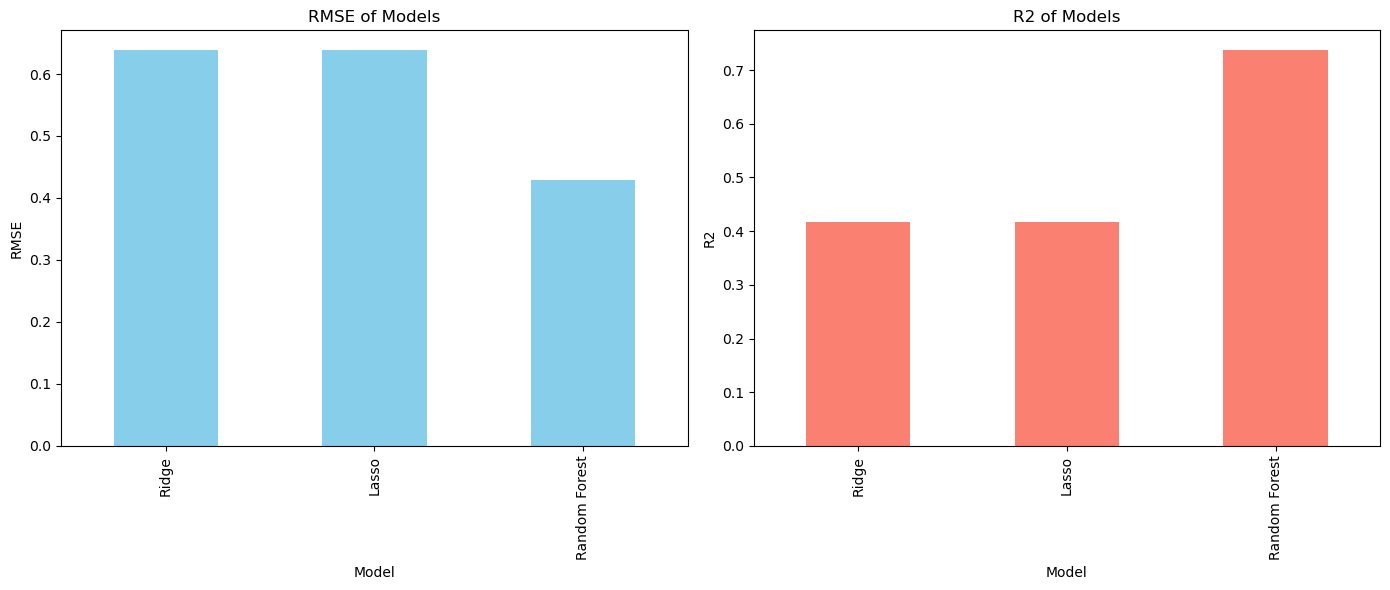

In [33]:
# create a visualization of the results
import matplotlib.pyplot as plt

# Extract RMSE and R2 values
rmse_values = results_df['RMSE']
r2_values = results_df['R2']

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot RMSE
rmse_values.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('RMSE of Models')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Model')

# Plot R2
r2_values.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('R2 of Models')
ax[1].set_ylabel('R2')
ax[1].set_xlabel('Model')

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
ridge_params

{'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
        3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
        9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
        2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
        9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
        2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
        8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
        2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
        8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
        2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
        7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
        2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
        7.54312006e+02, 1.00000000e+03])}

Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalanceconcerns.

In [45]:
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]

In [ ]:
# check y class count
y.value_counts()

Received a 'pepper'?
0.0    6494
1.0    5666
Name: count, dtype: int64

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Prepare data
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features and apply SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 4. Define models with parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'class_weight': ['balanced', None]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
}

# 5. Train and evaluate models
results = {}
predictions = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")
    
    # Grid search
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    # Fit
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    # Predict
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
    y_pred = grid_search.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'Best Params': grid_search.best_params_
    }
    
    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }




Training Logistic Regression...

Training Random Forest...



Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Training AdaBoost...


/opt/anaconda3/envs/NN/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa


Training Decision Tree...

Training KNN...

Training SVM...


/opt/anaconda3/envs/NN/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


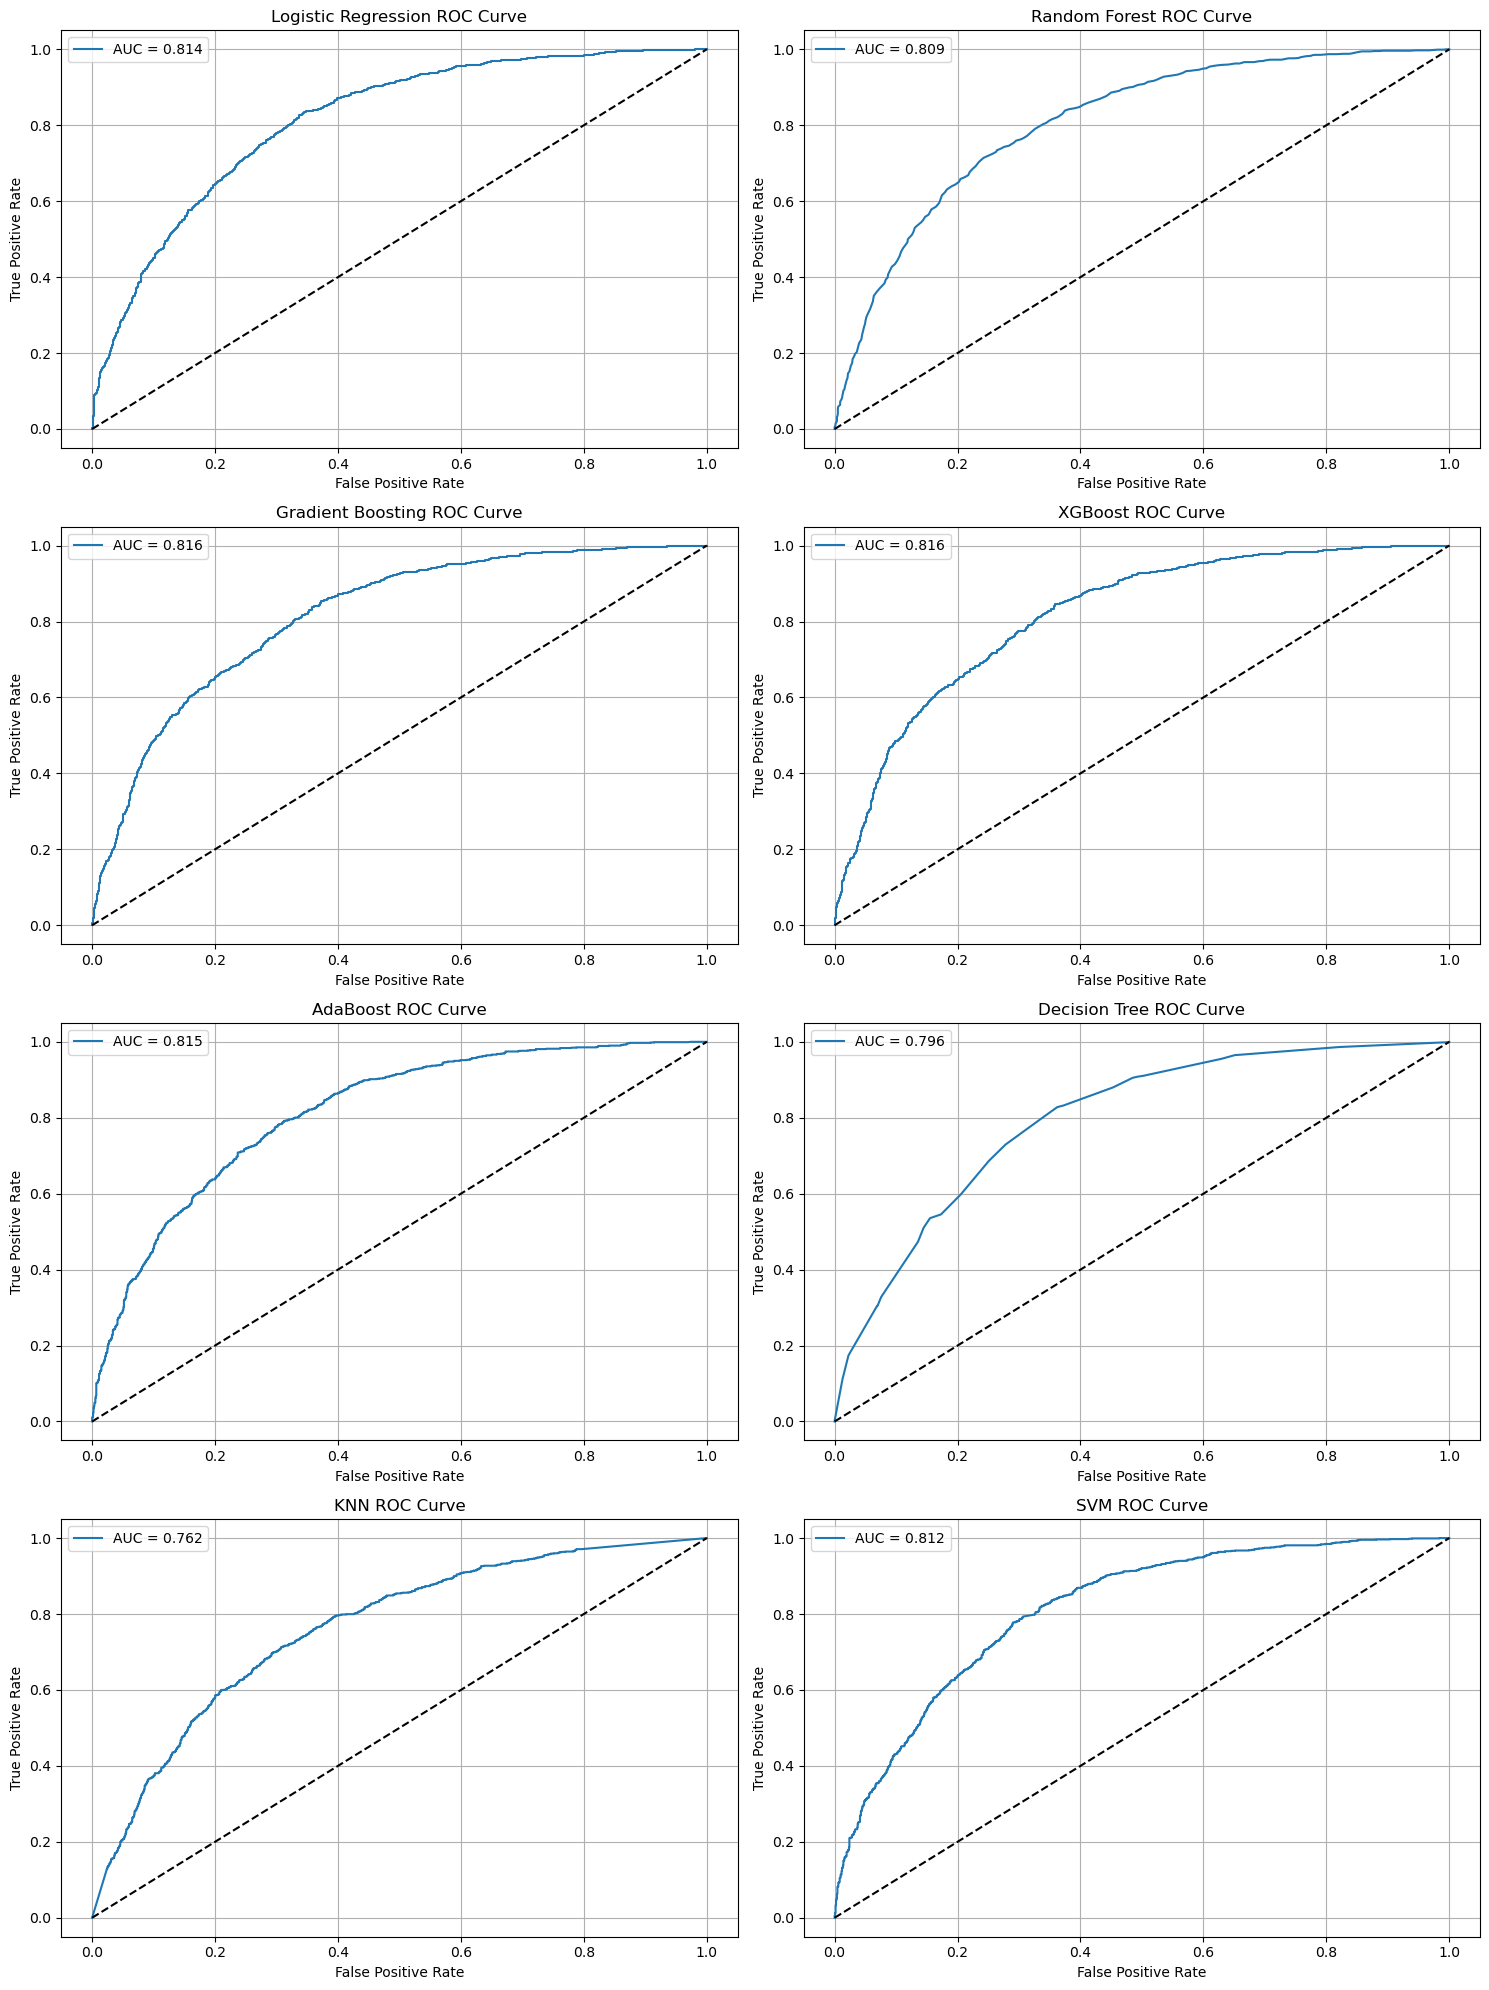

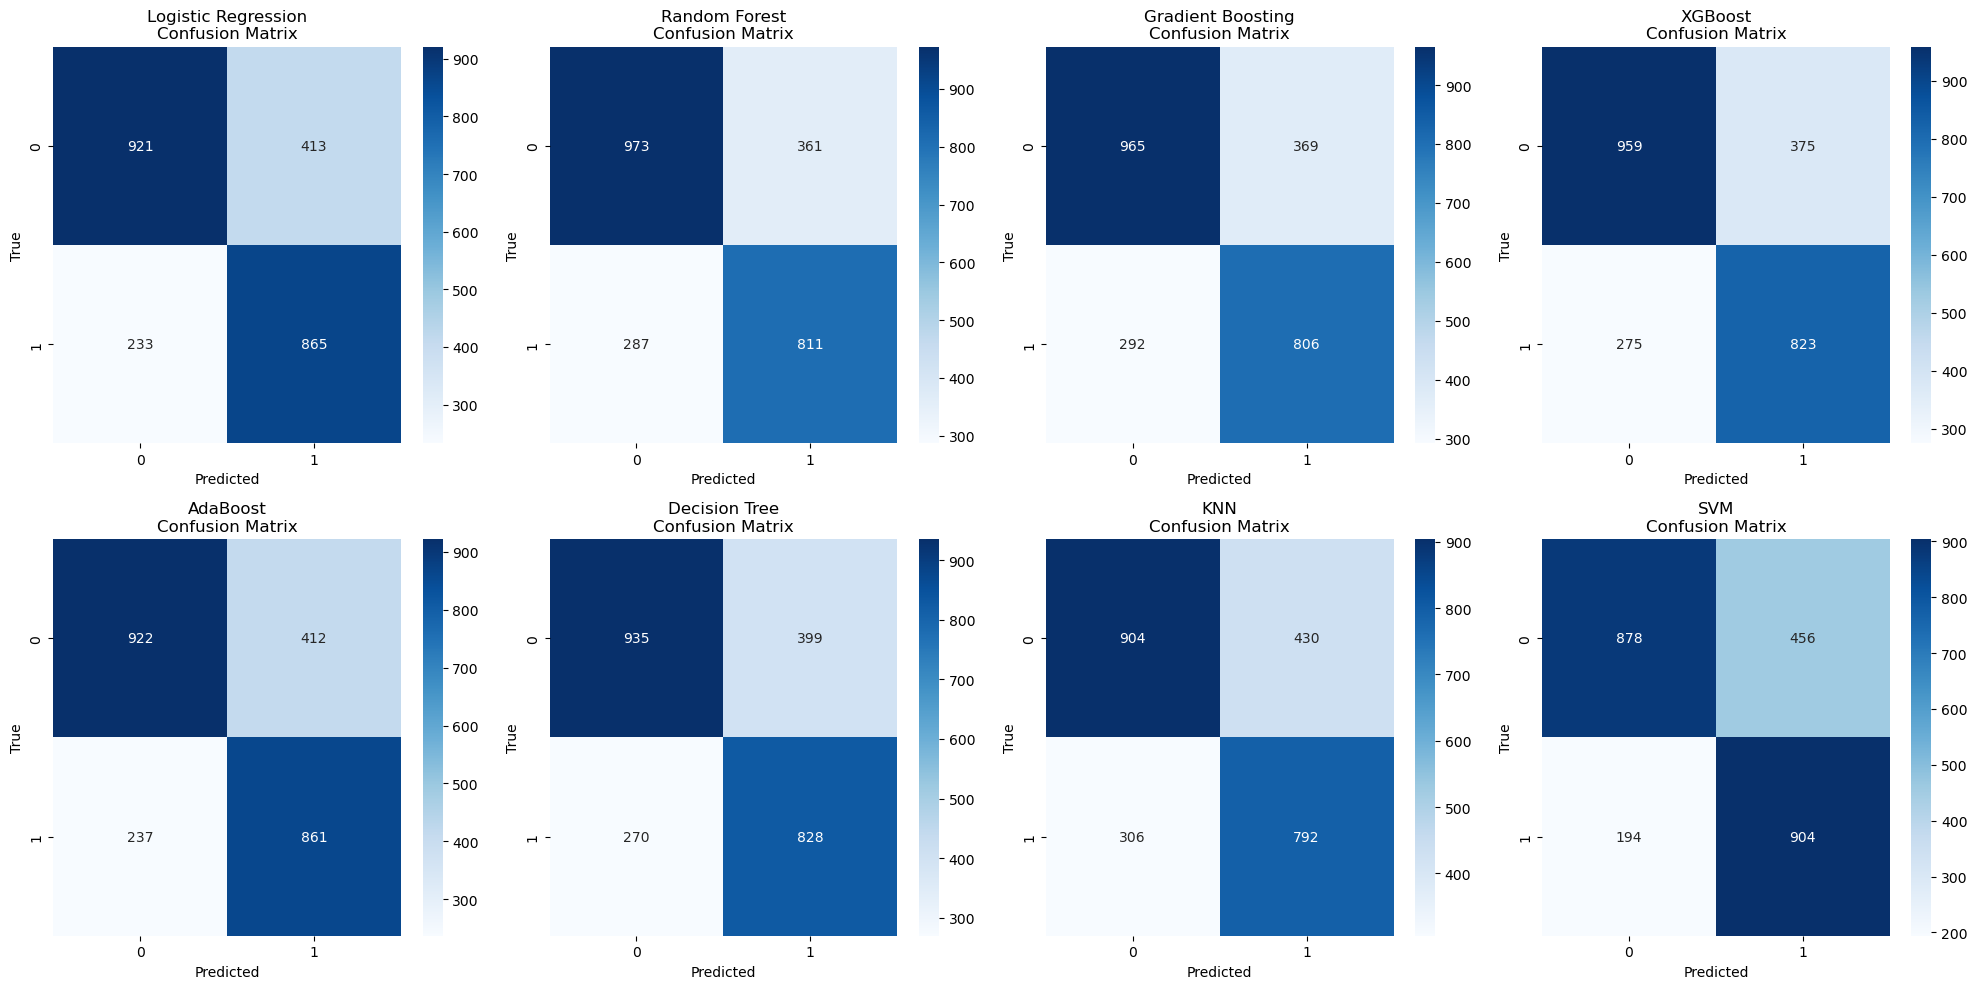

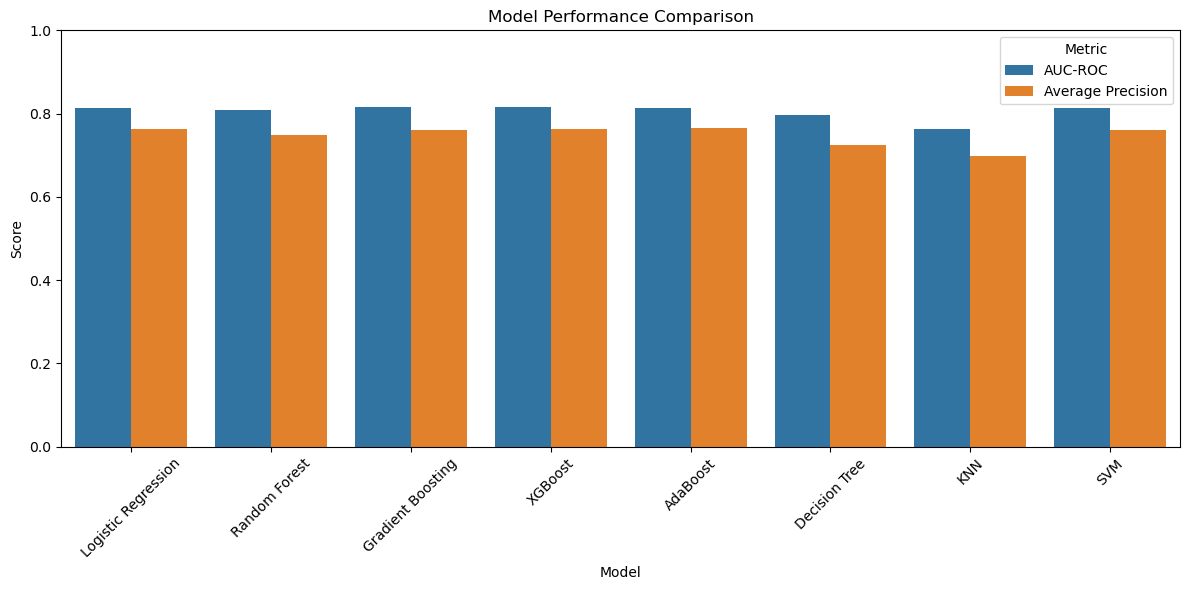


Model Performance Summary:
                     AUC-ROC  Average Precision
XGBoost                0.816              0.762
Gradient Boosting      0.816              0.762
AdaBoost               0.815              0.764
Logistic Regression    0.814              0.764
SVM                    0.812              0.761
Random Forest          0.809              0.748
Decision Tree          0.796              0.724
KNN                    0.762              0.699

Best Model (XGBoost) Details:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1334
         1.0       0.69      0.75      0.72      1098

    accuracy                           0.73      2432
   macro avg       0.73      0.73      0.73      2432
weighted avg       0.74      0.73      0.73      2432



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                           average_precision_score, classification_report, 
                           confusion_matrix)
from imblearn.over_sampling import SMOTE

# 3. Scale features and apply SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 4. Define expanded set of models with parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'scale_pos_weight': [1, 3]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # Manhattan or Euclidean distance
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'class_weight': ['balanced', None]
        }
    }
}

# 5. Train and evaluate models
results = {}
predictions = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")
    
    # Grid search
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    # Fit
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    # Predict
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
    y_pred = grid_search.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'Average Precision': average_precision_score(y_test, y_pred_proba),
        'Best Params': grid_search.best_params_
    }
    
    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


# Plot ROC curves (with multiple subplots for better visibility)
n_cols = 2
n_rows = (len(models) + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()

for idx, (name, preds) in enumerate(predictions.items()):
    fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
    auc = roc_auc_score(y_test, preds['y_pred_proba'])
    
    axes[idx].plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    axes[idx].plot([0, 1], [0, 1], 'k--')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'{name} ROC Curve')
    axes[idx].legend()
    axes[idx].grid(True)

# Remove empty subplots if any
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Plot confusion matrices
n_cols = 4
n_rows = (len(models) + 3) // 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()

for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

# Remove empty subplots if any
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Create performance comparison bar plot
metrics_df = pd.DataFrame(
    [(name, results[name]['AUC-ROC'], results[name]['Average Precision']) 
     for name in results.keys()],
    columns=['Model', 'AUC-ROC', 'Average Precision']
).melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nModel Performance Summary:")
print("=" * 50)
summary_df = pd.DataFrame({
    'AUC-ROC': [results[m]['AUC-ROC'] for m in results],
    'Average Precision': [results[m]['Average Precision'] for m in results]
}, index=results.keys())
summary_df = summary_df.sort_values('AUC-ROC', ascending=False)
print(summary_df.round(3))

# Print detailed results for best model
best_model = summary_df.index[0]
print(f"\nBest Model ({best_model}) Details:")
print("=" * 50)
print(f"Best Parameters: {results[best_model]['Best Params']}")
print("\nClassification Report:")
print(classification_report(y_test, predictions[best_model]['y_pred']))

In [ ]:


# Prepare data
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale numerical features (optional, based on the model)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Train a model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale numerical features (optional, based on the model)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define Random Forest and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use AUC-ROC as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Metrics
auc = roc_auc_score(y_test, y_proba)
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("AUC-ROC:", auc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Prepare data
x_cols = list(set(tags_columns).union(set(num_columns)))
x_cols.remove("Received a 'pepper'?")
y = merged_df["Received a 'pepper'?"]
X = merged_df[x_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network
class PepperPredictorNN(nn.Module):
    def __init__(self, input_size):
        super(PepperPredictorNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize the model
input_size = X_train_balanced.shape[1]
model = PepperPredictorNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_proba = model(X_test_tensor).squeeze().numpy()
    y_pred = (y_proba > 0.5).astype(int)

# Metrics
auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
# TRY EXTRA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
num_data = pd.read_csv("rmpCapstoneNum.csv")
qual_data = pd.read_csv("rmpCapstoneQual.csv", names=["Major", "University", "State"])

# Merge datasets on index
data = pd.concat([num_data, qual_data], axis=1)

# Group data by state and calculate mean ratings and difficulty
state_stats = merged_df.groupby("US State").agg(
    mean_rating=("Average Rating", "mean"),
    mean_difficulty=("Average Difficulty", "mean"),
    num_professors=("US State", "size")
).reset_index()

# Filter states with a significant number of professors (e.g., > 50)
state_stats = state_stats[state_stats["num_professors"] > 50]

# Plot mean rating and difficulty by state
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=state_stats,
    x="mean_difficulty",
    y="mean_rating",
    size="num_professors",
    hue="mean_rating",
    palette="coolwarm",
    sizes=(20, 200)
)
plt.title("Professor Ratings and Difficulty by State")
plt.xlabel("Mean Difficulty")
plt.ylabel("Mean Rating")
plt.legend(title="Mean Rating")
plt.show()


In [19]:
merged_df.columns

Index(['Average Rating', 'Average Difficulty', 'Number of Ratings',
       'Received a 'pepper'?', 'Proportion Retake', 'Online Ratings Count',
       'Male Gender', 'Female Gender', 'Major/Field', 'University', 'US State',
       'Tough grader', 'Good feedback', 'Respected', 'Lots to read',
       'Participation matters', 'Don't skip class', 'Lots of homework',
       'Inspirational', 'Pop quizzes!', 'Accessible', 'So many papers',
       'Clear grading', 'Hilarious', 'Test heavy', 'Graded by few things',
       'Amazing lectures', 'Caring', 'Extra credit', 'Group projects',
       'Lecture heavy'],
      dtype='object')